In [8]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

In [17]:
xl = pd.ExcelFile('20190927_HeartSurvey_edited.xlsx')
survey = xl.parse("Sheet1")
survey

,Duration (in seconds),RecordedDate,ResponseId,Q2.1,Q2.2,Q2.3,Q4.2_1,Q4.3,Q5.2_1,Q5.3,...,Q69.1_2,Q69.1_3,Q69.1_4,Q69.1_5,Q69.1_6,Q69.1_7,Q69.1_8,Q69.1_9,Q69.1_10,Q69.2_1
0,10106,2019-09-11 16:40:00,R_32XStqqXgBnksiC,Physician,20-24 years,20-24 years,0,Yes,100,No,...,NaN,NaN,Number 3,Number 2,NaN,NaN,NaN,Number 4,Number 1,Highly Risk Tolerant
1,4925,2019-09-11 16:40:00,R_2bTotYExBytoNpf,Physician,0-4 years,0-4 years,9,Yes,49,No,...,NaN,NaN,NaN,Number 4,Number 2,Number 1,NaN,NaN,Number 3,Neutral
2,10386,2019-09-11 16:40:00,R_28HubDeTQcBnH6b,Physician,0-4 years,0-4 years,0,Yes,100,No,...,NaN,Number 2,NaN,Number 3,NaN,NaN,NaN,Number 4,Number 5,Neutral
3,10243,2019-09-11 16:40:00,R_3rZnt5JFNJxWU8U,Physician,5-9 years,5-9 years,10,Yes,100,No,...,NaN,Number 5,Number 4,Number 3,NaN,NaN,NaN,NaN,Number 2,Neutral
4,10723,2019-09-11 16:41:00,R_8CzCYLAwaFnUdcR,Physician,20-24 years,20-24 years,8,Yes,99,No,...,NaN,NaN,Number 3,Number 4,NaN,Number 5,NaN,NaN,Number 2,Somewhat Risk Averse
5,9029,2019-09-11 16:41:00,R_1DI5JawW4BMHg7Z,Physician,5-9 years,5-9 years,0,Yes,92,No,...,NaN,NaN,Number 4,Number 1,NaN,Number 5,NaN,NaN,Number 3,Somewhat Risk Tolerant
6,9968,2019-09-11 16:41:00,R_2Y99lZzaCYAnM7j,Physician,5-9 years,5-9 years,0,Yes,100,No,...,NaN,NaN,Number 1,Number 2,NaN,Number 5,NaN,Number 4,Number 3,Neutral
7,10549,2019-09-11 16:41:00,R_2eXsVhzR5Oh0Ige,Physician,0-4 years,0-4 years,0,Yes,100,No,...,NaN,NaN,Number 1,Number 4,NaN,NaN,NaN,Number 2,Number 3,Somewhat Risk Averse
8,9620,2019-09-11 16:41:00,R_2bZx4btSLlsHucd,Physician,25-29 years,25+ years,0,Yes,100,No,...,NaN,NaN,Number 2,Number 3,NaN,NaN,Number 5,Number 4,Number 1,Neutral
9,9903,2019-09-11 16:41:00,R_1fmjSgn7070yoo3,Physician,5-9 years,5-9 years,1,Yes,100,No,...,NaN,NaN,Number 2,Number 1,NaN,NaN,Number 5,NaN,Number 4,Somewhat Risk Averse


In [3]:
risk = survey.iloc[:, 6:130:2].fillna(50) ## All the actual questions, risk value
risk

,Q4.2_1,Q5.2_1,Q7.2_1,Q8.2_1,Q9.2_1,Q10.2_1,Q11.2_1,Q12.2_1,Q13.2_1,Q14.2_1,...,Q58.2_1,Q59.2_1,Q60.2_1,Q61.2_1,Q62.2_1,Q63.2_1,Q64.2_1,Q65.2_1,Q66.2_1,Q67.2_1
0,0,100,50.0,92,63.0,0,100.0,40.0,100,0,...,89,40.0,100,100,77,66.0,84,15,70.0,86.0
1,9,49,77.0,100,62.0,7,50.0,50.0,80,14,...,83,71.0,100,94,90,80.0,100,11,79.0,82.0
2,0,100,41.0,82,35.0,6,61.0,46.0,69,5,...,72,54.0,94,82,73,72.0,90,24,59.0,77.0
3,10,100,59.0,100,50.0,0,90.0,60.0,96,15,...,76,38.0,92,74,92,50.0,85,13,50.0,50.0
4,8,99,68.0,81,58.0,3,88.0,16.0,77,15,...,84,76.0,92,88,86,81.0,91,31,74.0,71.0
5,0,92,59.0,97,12.0,0,71.0,39.0,74,0,...,69,58.0,87,78,79,70.0,86,8,64.0,74.0
6,0,100,25.0,82,59.0,0,90.0,57.0,77,71,...,62,56.0,68,67,69,65.0,63,47,59.0,55.0
7,0,100,70.0,100,67.0,0,100.0,65.0,91,67,...,89,73.0,100,88,94,70.0,75,33,65.0,63.0
8,0,100,35.0,92,22.0,0,87.0,19.0,91,3,...,77,57.0,90,63,87,58.0,73,39,70.0,56.0
9,1,100,38.0,82,48.0,5,76.0,59.0,75,20,...,71,50.0,76,67,83,62.0,58,12,35.0,57.0


In [4]:
risk.columns = [i for i in range(62)]
risk

,0,1,2,3,4,5,6,7,8,9,...,52,53,54,55,56,57,58,59,60,61
0,0,100,50.0,92,63.0,0,100.0,40.0,100,0,...,89,40.0,100,100,77,66.0,84,15,70.0,86.0
1,9,49,77.0,100,62.0,7,50.0,50.0,80,14,...,83,71.0,100,94,90,80.0,100,11,79.0,82.0
2,0,100,41.0,82,35.0,6,61.0,46.0,69,5,...,72,54.0,94,82,73,72.0,90,24,59.0,77.0
3,10,100,59.0,100,50.0,0,90.0,60.0,96,15,...,76,38.0,92,74,92,50.0,85,13,50.0,50.0
4,8,99,68.0,81,58.0,3,88.0,16.0,77,15,...,84,76.0,92,88,86,81.0,91,31,74.0,71.0
5,0,92,59.0,97,12.0,0,71.0,39.0,74,0,...,69,58.0,87,78,79,70.0,86,8,64.0,74.0
6,0,100,25.0,82,59.0,0,90.0,57.0,77,71,...,62,56.0,68,67,69,65.0,63,47,59.0,55.0
7,0,100,70.0,100,67.0,0,100.0,65.0,91,67,...,89,73.0,100,88,94,70.0,75,33,65.0,63.0
8,0,100,35.0,92,22.0,0,87.0,19.0,91,3,...,77,57.0,90,63,87,58.0,73,39,70.0,56.0
9,1,100,38.0,82,48.0,5,76.0,59.0,75,20,...,71,50.0,76,67,83,62.0,58,12,35.0,57.0


In [5]:
waitlist = survey.iloc[:, 7:130:2] ## All the actual questions, risk value
waitlist

,Q4.3,Q5.3,Q7.3,Q8.3,Q9.3,Q10.3,Q11.3,Q12.3,Q13.3,Q14.3,...,Q58.3,Q59.3,Q60.3,Q61.3,Q62.3,Q63.3,Q64.3,Q65.3,Q66.3,Q67.3
0,Yes,No,Yes,No,Yes,Yes,No,Yes,No,Yes,...,No,Yes,No,No,No,Yes,No,Yes,Yes,No
1,Yes,No,Yes,No,Yes,Yes,No,Yes,No,Yes,...,No,Yes,No,No,No,Yes,No,Yes,Yes,No
2,Yes,No,Yes,No,Yes,Yes,Yes,Yes,No,Yes,...,No,Yes,No,No,No,Yes,No,Yes,Yes,No
3,Yes,No,Yes,No,Yes,Yes,No,Yes,No,Yes,...,No,Yes,No,No,No,Yes,No,Yes,Yes,Yes
4,Yes,No,Yes,No,Yes,Yes,No,Yes,No,Yes,...,No,Yes,No,No,No,Yes,No,Yes,Yes,Yes
5,Yes,No,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,...,Yes,Yes,No,No,Yes,Yes,No,Yes,Yes,Yes
6,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,...,No,Yes,No,No,No,No,No,Yes,No,No
7,Yes,No,Yes,No,Yes,Yes,No,Yes,No,Yes,...,No,Yes,No,No,No,No,No,Yes,No,No
8,Yes,No,Yes,No,Yes,Yes,No,Yes,No,Yes,...,No,Yes,No,No,No,Yes,No,Yes,No,Yes
9,Yes,No,Yes,No,Yes,Yes,No,Yes,Yes,Yes,...,No,Yes,No,No,No,Yes,Yes,Yes,Yes,Yes


In [6]:
waitlist.columns = [i for i in range(62)]
waitlist

,0,1,2,3,4,5,6,7,8,9,...,52,53,54,55,56,57,58,59,60,61
0,Yes,No,Yes,No,Yes,Yes,No,Yes,No,Yes,...,No,Yes,No,No,No,Yes,No,Yes,Yes,No
1,Yes,No,Yes,No,Yes,Yes,No,Yes,No,Yes,...,No,Yes,No,No,No,Yes,No,Yes,Yes,No
2,Yes,No,Yes,No,Yes,Yes,Yes,Yes,No,Yes,...,No,Yes,No,No,No,Yes,No,Yes,Yes,No
3,Yes,No,Yes,No,Yes,Yes,No,Yes,No,Yes,...,No,Yes,No,No,No,Yes,No,Yes,Yes,Yes
4,Yes,No,Yes,No,Yes,Yes,No,Yes,No,Yes,...,No,Yes,No,No,No,Yes,No,Yes,Yes,Yes
5,Yes,No,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,...,Yes,Yes,No,No,Yes,Yes,No,Yes,Yes,Yes
6,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,...,No,Yes,No,No,No,No,No,Yes,No,No
7,Yes,No,Yes,No,Yes,Yes,No,Yes,No,Yes,...,No,Yes,No,No,No,No,No,Yes,No,No
8,Yes,No,Yes,No,Yes,Yes,No,Yes,No,Yes,...,No,Yes,No,No,No,Yes,No,Yes,No,Yes
9,Yes,No,Yes,No,Yes,Yes,No,Yes,Yes,Yes,...,No,Yes,No,No,No,Yes,Yes,Yes,Yes,Yes


In [7]:
risk.mean()

0      2.500000
1     95.000000
2     55.083333
3     91.250000
4     45.166667
        ...    
57    71.583333
58    82.166667
59    26.916667
60    66.333333
61    69.750000
Length: 62, dtype: float64

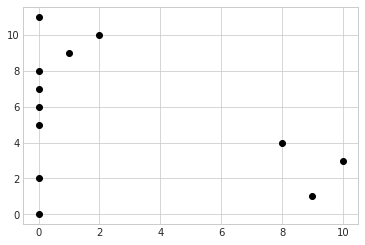

In [60]:
y = risk.index.values
x = risk[0]
plt.plot(x, y, 'o', color='black')

In [57]:
x

0      0
1      9
2      0
3     10
4      8
5      0
6      0
7      0
8      0
9      1
10     2
11     0
Name: 0, dtype: int64